CÁLCULO DA PRESSÃO NO INTERIOR DE PLANETAS. Turcotte pg. 148
<br>
<br>
Em um modelo esférico, a pressão (p) aumenta com a profundidade (a medida que o raio (r) diminui), pelo aumento de carga sobre um ponto analisado. Considerermos um modelo simples de planeta com duas camadas (núcleo e manto), com densidades rho_n e rho_m, assim como espessuras b e a-b respectivamente. A aceleração gravitacional em função de r, com G constante gravitacional, é dada por
<br>
<br>
g(r) = (4/3).pi.rho_n.G.r, para o intervalo 0 < r < b
<br>
<br>
e
<br>
<br>
g(r) = (4/3).pi.G(r.rho_m + b³(rho_n - rho_m)/r²), para o intervalo b < r < a.
<br>
<br>
A pressão em função do raio é dada por
<br>
<br>
p(r) = (4/3).pi.rho_m.G.b³(rho_n-rho_m)(1/r - 1/a) + (2/3).pi.G.rho_m²(a²-r²), para b < r < a
<br>
<br>
e
<br>
<br>
p(r) = (2/3).pi.G.rho_n²(b²-r²) + (2/3).pi.G.rho_m²(a²-b²) + (4/3).pi.rho_m.G.b³(rho_n - rho_m)(1/b - 1/a),
<br>
para 0 < r < b.
<br>
<br>
As equações diferenciais que fornecem a variação de p em função de r ficam
<br>
<br>
dp/dr = -(4/3).pi.rho_m.G.b³(rho_n-rho_m)(1/r²) - (4/3).pi.G.rho_m².r, para b < r < a
<br>
<br>
e
<br>
<br>
dp/dr = -(4/3).pi.G.rho_n².r, para 0 < r < b.

In [30]:
# MODULOS DO PYTHON
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# FUNCOES

def g_n(rho_n,G,r): # calcula a aceleracao gravitacional no nucleo
    g = (4/3)*np.pi*rho_n*G*r
    return g

def g_m(rho_m,rho_n,G,r,b): # calcula a aceleracao gravitacional no nucleo
    g = (4/3)*np.pi*G*(r*rho_m + (b**3)*(rho_n - rho_m)/(r**2))
    return g

def p_n(G,rho_n,rho_m,b,a,r): # calcula a pressao no nucleo
    p = (2/3)*np.pi*G*(rho_n**2)*((b**2) - (r**2)) + (2/3)*np.pi*G*(rho_m**2)*((a**2) - (b**2)) + (4/3)*np.pi*rho_m*G*(b**3)*(rho_n - rho_m)*((1/b) - (1/a))
    return p

def p_m(G,rho_n,rho_m,b,a,r): # calcula a pressao no manto
    p = (4/3)*np.pi*rho_m*G*(b**3)*(rho_n-rho_m)*((1/r) - (1/a)) + (2/3)*np.pi*G*(rho_m**2)*((a**2) - (r**2))
    return p

def dp_n(G,rho_n,r): # calcula a variacao da pressao no nucleo em funcao de r
    dp = -(4/3)*np.pi*G*(rho_n**2)*r
    return dp

def dp_m(G,rho_m,rho_n,b,r): # calcula a variacao da pressao no manto em funcao de r
    dp = -(4/3)*np.pi*rho_m*G*(b**3)*(rho_n-rho_m)*(1/(r**2)) - (4/3)*np.pi*G*(rho_m**2)*r
    return dp

In [32]:
# PARAMETROS DO MODELO
G = 6.67E-11 # constante gravitacional (m³/(km.s²))
rho_n = 12000 # densidade media no nucleo da Terra (kg/m³) 
rho_m = 4000 # densidade media no manto da Terra (kg/m³)
b = 3486000 # raio do nucleo da Terra (m)
a = 6371000 # raio do centro da Terra ao limite do manto (m)
r_n = np.arange(3486000,0,-50000) # raio de investigacao no nucleo, de 50 em 50 km (m)
r_m = np.arange(6371000,3486000,-50000) # raio de investigacao no manto, de 50 em 50 km (m)

In [34]:
# BLOCO PRINCIPAL

grav_n = g_n(rho_n,G,r_n)
grav_m = g_m(rho_m,rho_n,G,r_m,b)
press_n = p_n(G,rho_n,rho_m,b,a,r_n)
press_m = p_m(G,rho_n,rho_m,b,a,r_m)
var_pn = dp_n(G,rho_n,r_n)
var_pm = dp_m(G,rho_m,rho_n,b,r_m)

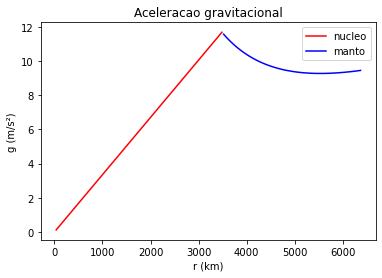

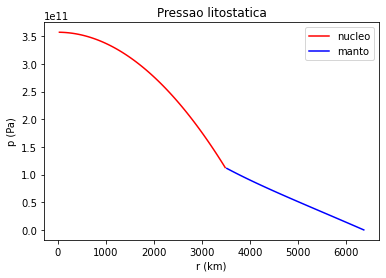

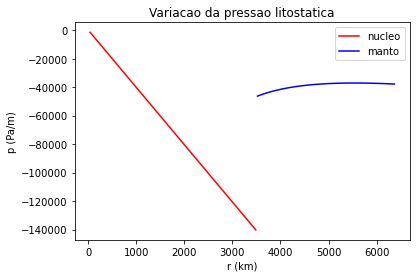

In [41]:
# PLOTAGEM DOS RESULTADOS
plt.figure()
plt.plot(r_n/1000,grav_n,'-r',r_m/1000,grav_m,'-b')
plt.legend(["nucleo","manto"])
plt.title("Aceleracao gravitacional")
plt.ylabel("g (m/s²)"); plt.xlabel("r (km)")
plt.show()

plt.figure()
plt.plot(r_n/1000,press_n,'-r',r_m/1000,press_m,'-b')
plt.legend(["nucleo","manto"])
plt.title("Pressao litostatica")
plt.ylabel("p (Pa)"); plt.xlabel("r (km)")
plt.show()

plt.figure()
plt.plot(r_n/1000,var_pn,'-r',r_m/1000,var_pm,'-b')
plt.legend(["nucleo","manto"])
plt.title("Variacao da pressao litostatica")
plt.ylabel("p (Pa/m)"); plt.xlabel("r (km)")
plt.show()